# Geospatial Data in Python: Database, Desktop, and the Web
## Tutorial (Part 3)

## Convert vector data formats (Shapefile -> GeoJSON)

In [1]:
%%bash
echo "hi"
python --version


hi


Python 3.5.4 :: Anaconda custom (64-bit)


In [2]:
import fiona
from fiona.crs import to_string
import os

boro_file = os.path.join("..", "data", "nybb", "nybb.shp")
out_file =  os.path.join("..", "data", "nybb", "nybb.geojson")

# Register format drivers with a context manager
with fiona.drivers():
    # Open the shapefile (can also open directly from zip files with vfs!)
    with fiona.open(boro_file) as source:
        print("Feature Count: %s" % len(source))
        print("Input Driver: %s" % source.driver)
        
        meta = source.meta
        meta.update(driver="GeoJSON")
        
        if os.path.exists(out_file):
            os.remove(out_file)
        with fiona.open(out_file, 'w', **meta) as sink:
            print("Output Driver: %s" % sink.driver)
            for rec in source:
                sink.write(rec)
# Did it work?
print("File Exists: %s" % os.path.exists(out_file))

Feature Count: 5
Input Driver: ESRI Shapefile
Output Driver: GeoJSON
File Exists: True


## Read geospatial raster data

Note: You can download the GeoTIFF of Manhattan used in this example [from here](https://www.dropbox.com/s/mba7obrfh2b2ucb/manhattan.tif). Make sure you put it in your `data` folder.

In [3]:
import rasterio
from fiona.crs import to_string
import os
import numpy as np

#image_file = os.path.join('..', 'data', 'manhattan.tif')
# image_file = os.path.join('..', 'data', 'l8rgb.tif')
image_file = os.path.join('..', 'data', 'l8rgb.tif')
#image_file = os.path.join('..', 'data', 'manhattan.png') # this one works - YAY!
image_file = os.path.join('..', 'data', 'l8rgb-1.png')


# Register format drivers with a context manager
with rasterio.drivers():
    with rasterio.open(image_file, 'r') as source:
        print(source.count, source.shape)
        print(source.driver)
        print(to_string(source.crs))
        
        # Get data from each band (newer versions of rasterio use source.read())
        #r, g, b = map(source.read_band, (1, 2, 3))
        r, g, b = source.read()
        data = np.dstack((r, g, b))  # Each band is just an ndarray!
        print(type(data))
        
        # Get the bounds of the raster (for plotting later)
        bounds = source.bounds[::2] + source.bounds[1::2]

/home/tony/anaconda3/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


3 (2500, 2500)
PNG

<class 'numpy.ndarray'>


An alternative way (outside of `with` context manager as above):

In [4]:
source = rasterio.open(image_file, 'r')

/home/tony/anaconda3/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


## Simple plot of geospatial raster

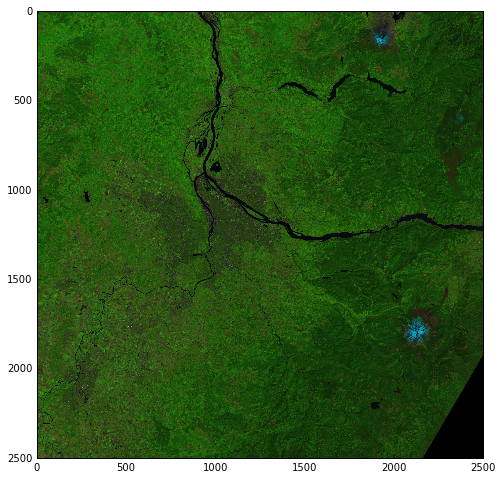

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
ax = plt.imshow(data, extent=bounds)
plt.show()

### Now with smaller scale png 



/home/tony/anaconda3/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


3 (1250, 1250)
PNG

<class 'numpy.ndarray'>


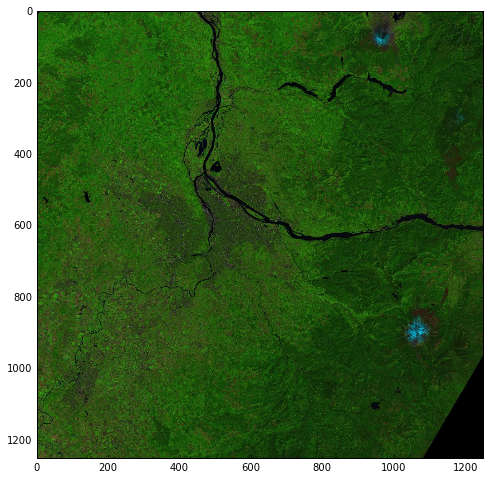

In [6]:
image_file = os.path.join('..', 'data', 'l8rgb-2.png')


# Register format drivers with a context manager
with rasterio.drivers():
    with rasterio.open(image_file, 'r') as source:
        print(source.count, source.shape)
        print(source.driver)
        print(to_string(source.crs))
        
        # Get data from each band (newer versions of rasterio use source.read())
        #r, g, b = map(source.read_band, (1, 2, 3))
        r, g, b = source.read()
        data = np.dstack((r, g, b))  # Each band is just an ndarray!
        print(type(data))
        
        # Get the bounds of the raster (for plotting later)
        bounds = source.bounds[::2] + source.bounds[1::2]
        
fig = plt.figure(figsize=(8, 8))
ax = plt.imshow(data, extent=bounds)
plt.show()